# 손실 함수
+ loss function

In [1]:
import numpy as np

In [29]:
def cross_entropy_error(y,t):
    delta = 0.0000001
    return -np.sum(t * np.log(y+ delta))

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1,0.05,0.6,0,0.05,0.1,0,0.1,0,0]
cross_entropy_error(np.array(y1), np.array(t))

0.510825457099338

In [7]:
y2 = [0.1,0.05,0.1,0,0.05,0.1,0,0.6,0,0]
cross_entropy_error(np.array(y2), np.array(t))

2.302584092994546

In [10]:
import sys
sys.path.append('./dataset')

In [11]:
from dataset.mnist import load_mnist

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label=True)
print(x_train.shape, t_train.shape)

(60000, 784) (60000, 10)


In [16]:
train_size = x_train.shape[0]
batch_size = 10 # 10개의 데이터를 한 번에 본다.
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(t_batch)

[20199  9592 41039 19314 54509 41923 28587 46448 25840 17192]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [17]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y))/batch_size

# Numerical Differentiation

In [18]:
def numerical_diff(f,x):
    h = 0.0001
    return (f(x+h)-f(x))/h

In [19]:
def function_1(x):
    return 0.01*x**2 + 0.2*x

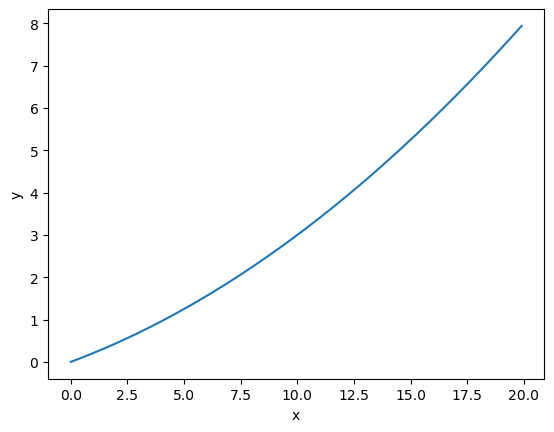

In [20]:
import matplotlib.pyplot as plt
x = np.arange(0,20,0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

In [21]:
numerical_diff(function_1, 5)

0.3000009999976072

In [22]:
numerical_diff(function_1, 10)

0.4000010000027032

In [26]:
def function_2_partial1(x0):
    return x0**2 + 4**2
def function_2_partial2(x1):
    return 3**2 + x1**2

In [27]:
numerical_diff(function_2_partial1, 3)

6.000099999994291

In [28]:
numerical_diff(function_2_partial2, 4)

8.00009999998963

In [33]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gardient(f,x)
        # gard가 0이 될 때 x값이 고정이 됨
        # 그 지점이 최적 가중치
        x -= lr*grad
    return x, np.array(x_history)

In [30]:
def numerical_gardient(f,x) :
    '''
    f : 함수
    x : 변수
    return 값 : 변수의 기울기 값
    
    각 가중치의 특정 함수에서의 기울기를 구하는 것
    '''
    h = 0.0001
    grad = np.zeros_like(x)
    
    # 과도한 for문 사용을 줄이기 위한 코드
    # flags : 추적이 가능하게 다차원 배열의 인덱스를 튜플로 받는 속성
    # op_flags : 읽기와 쓰기가 가능하게 하는 속성
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])

    while not it.finished:
        # multi_index 속성으로 인덱스를 불러올 수 있다
        index = it.multi_index
        
        tmp_val = x[index]
        x[index] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[index] = tmp_val
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / h
        it.iternext()
        
    return np.round(grad, 3)
def softmax(a):
    '''
    각 분류 노드에서의 확률을 계산
    '''
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

###  신경망 클래스 정의
+ 가중치를 2x3 형상의 랜덤값으로 초기화하고
+ 입력값과 가중치로 행렬곱을 하여 예측을 수행하는 함수 및 결과의 소프트맥스 확률 값 및 정답 레이블을 이용해 손실값을 계산하는 함수 정의

In [31]:
class simpleNet:
    '''
    predict : 예측 메서드
    loss : 예측을 수행하고 결과의 각 확률을 구한 뒤 정답과 비교하여 전체 오차 값 계산
    '''
    def __init__(self):
        # 가우시안 표준 정규 분포에서 난수 matrix array 생성
        self.W = np.random.randn(2,3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [2]:
import matplotlib.pyplot as plt

In [3]:
def numerical_diff(f,w):
    dw = 0.0001
    return (f(w+dw)-f(w))/ dw

In [4]:
def loss_function(w):
    return w**2

In [5]:
w = np.arange(-10.0, 10, 0.1)
y = loss_function(w)

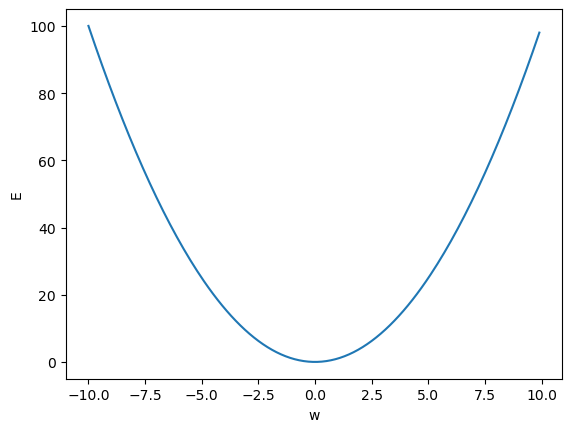

In [6]:
plt.xlabel('w')
plt.ylabel('E')
plt.plot(w,y)
plt.show()

In [7]:
w_50 = numerical_diff(loss_function,5)
w_25 = numerical_diff(loss_function, 2.5)
print(w_50, w_25)

10.000099999984968 5.000100000014385
